In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time as tm
import matplotlib.pyplot as plt

In [2]:
#------------df_auc------------#
# Memory before: 2563842869 MB
# Memory after:  1898419057 MB

#------------df_clk------------#
# Memory before: 8063486 MB
# Memory after:  6298107 MB

#------------df_evt------------#
# Memory before: 1016740496 MB
# Memory after:   671254666 MB

#------------df_evt------------#
# Memory before: 1536659 MB
# Memory after:   939934 MB

In [3]:
loc_df = r"C:\Users\FacundoTorraca\Documents\Facultad\Organizacion de Datos\Trabajo Practico 1\CSV"

In [4]:
dtypes_auc = { "auction_type_id": np.float16, "country": "category", "platform": "category", "ref_type_id": "category", 
               "source_id": "category", "device_id": "category" }

dtypes_clk = { "advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "country_code": "category", 
               "latitude": np.float16, "longitude": np.float16, "wifi_connection": "category", "carrier_id": np.float16,
               "trans_id": "object", "os_major":np.float32, "brand": np.float16, "touchX": np.float16,
               "touchY": np.float16  }

dtypes_evt = { "event_id":np.int32, "application_id": np.int32, "attributed":"category", "device_countrycode":"category",
               "device_os_version":"category", "device_brand": np.float32, "device_model": "category",
               "device_city":"category", "session_user_agent":"category", "user_agent":np.float32, "carrier":"category",
               "kind":"category", "wifi":"category", "connection_type":"category", "device_language":"category",
               "trans_id":"object" }

dtypes_ins = { "application_id":"category", "ref_type":"category", "click_hash":np.float16, 
               "device_countrycode":"category", "device_brand": np.float32, "session_user_agent":"category",
               "kind":"category", "wifi":"category", "device_language":"category"}

In [5]:
df_auc = pd.read_csv( loc_df + "\\auctions.csv.gzip", compression = "gzip", dtype = dtypes_auc )
del df_auc["auction_type_id"] #Todo NaN

In [6]:
df_clk = pd.read_csv( loc_df + "\\clicks.csv.gzip", compression = "gzip" , dtype = dtypes_clk )

In [7]:
df_evt = pd.read_csv( loc_df + "\\events.csv.gzip", compression = "gzip", dtype = dtypes_evt )

In [8]:
df_ins = pd.read_csv( loc_df + "\\installs.csv.gzip", compression = "gzip", dtype = dtypes_ins )

In [9]:
print( "DF_AUC: ", df_auc.columns )
print(" ")
print( "DF_CLK: ", df_clk.columns )
print(" ")
print( "DF_EVT: ", df_evt.columns )
print(" ")
print( "DF_INS: ", df_ins.columns )

DF_AUC:  Index(['country', 'date', 'device_id', 'platform', 'ref_type_id', 'source_id'], dtype='object')
 
DF_CLK:  Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')
 
DF_EVT:  Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')
 
DF_INS:  Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 's

# Los 10 dispositivos que mas participaron en subastas

In [10]:
ten_main_devices = df_auc["device_id"].value_counts().head( 10 ).to_frame().reset_index()
ten_main_devices.columns = ["Device ID", "Total Auctions"]
ten_main_devices["Reference"] = [ ("Device " + str( i ) ) for i in range(0, 10) ]
ten_main_devices = ten_main_devices[ ["Reference", "Device ID", "Total Auctions"] ]
ten_main_devices

,Reference,Device ID,Total Auctions
0,Device 0,633139769114048761,27762
1,Device 1,7202276635029175071,23055
2,Device 2,7298861376107043945,18188
3,Device 3,6302840482782120473,16400
4,Device 4,5376802567578262905,16367
5,Device 5,8963711959081981780,14362
6,Device 6,795159065504552200,12275
7,Device 7,6841615430383729819,12077
8,Device 8,5384039226444052914,11632
9,Device 9,3198179064438296471,11565


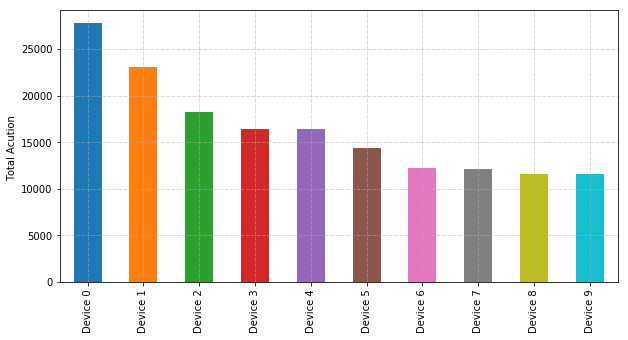

In [11]:
ax_1 = ten_main_devices.plot( kind = "bar", x = "Reference", y = "Total Auctions", grid = True, figsize = (10,5) );
ax_1.grid( linestyle = "-.", linewidth = 0.5 )
ax_1.set_xlabel( "" )
ax_1.set_ylabel( "Total Acution " )
ax_1.get_legend().remove()

# Relacion subastas participadas y numeros de clicks en intervalos de media hora

In [12]:
#-------------------------------------------------------------Herramientas de Seleccion----------------------------------------------------------------------#
start = dt.datetime(1900, 1, 1, 0, 0, 0) #No importa el año
start_def = dt.datetime(1900, 1, 1, 0, 30, 0) #No importa el año
array_time = [ (start + dt.timedelta(minutes = 30 * x) ).time() for x in range(0, 48) ] 
array_time_def = [ (start_def + dt.timedelta(minutes = 30 * x) ).time() for x in range(0, 48) ]
time_range = list( zip( array_time, array_time_def ) )

start_interval = dt.datetime(2019, 3, 1, 0, 0, 0)
interval = np.array( [ (start_interval + dt.timedelta(minutes = 30 * x) ) for x in range(0, 49) ] )
#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [13]:
df_auc["date"] = pd.to_datetime( df_auc["date"], errors = "coerce" )

In [ ]:
df_auc_modified = df_auc["date"].apply( lambda x: x.replace( day = 1 ) ).to_frame() #Reemplaza para que se pueda usar los bins

In [ ]:
df_auc_modified = pd.cut( df_auc_modified["date"], interval ).value_counts().to_frame()
df_auc_modified = df_auc_modified.reset_index()
df_auc_modified.sort_values( by = "index", inplace = True )
df_auc_modified["Time Range"] = time_range
del df_auc_modified["index"]
df_auc_modified.columns = [ "Number Auctions", "Time Range"]
df_auc_modified = df_auc_modified[ ["Time Range", "Number Auctions"] ]

In [ ]:
df_clk["created"] = pd.to_datetime( df_clk["created"], errors = "coerce" )
df_clk_modified = df_clk["created"].apply( lambda x: x.replace( day = 1 ) ).to_frame() #Reemplaza para que se pueda usar los bins

In [ ]:
df_clk_modified = pd.cut( df_clk_modified["created"], interval ).value_counts().to_frame()
df_clk_modified = df_clk_modified.reset_index()
df_clk_modified.sort_values( by = "index", inplace = True )
df_clk_modified["Time Range"] = time_range
del df_clk_modified["index"]
df_clk_modified.columns = [ "Number Clicks", "Time Range" ]

In [ ]:
merge_auc_clk = df_auc_modified.merge( df_clk_modified, how = "inner" )

In [ ]:
merge_auc_clk.head()

In [ ]:
fig = plt.figure( figsize = (15,5) )

# Divide the figure into a 1x2 grid, and give me the first section
ax_1 = fig.add_subplot(1,2,1)

# Divide the figure into a 1x2 grid, and give me the second section
ax_2 = fig.add_subplot(1,2,2)


title_1 = "10 rangos horarios en que mas se realizaron subastas"
title_2 = "10 rangos horarios en que mas se realizaron clicks"

color_auc = ["dodgerblue", "gold", "seagreen", "deeppink", "grey", "darkorange", "brown", "violet", "red", "cyan"]
color_clk = ["dodgerblue", "deeppink", "gold", "darkorange", "grey", "brown", "black", "black", "black", "black"]

merge_auc_clk.nlargest( columns = "Number Auctions", n = 10 ).plot( kind= "bar", x = 'Time Range', y = "Number Auctions", grid = True, ax = ax_1, legend = False, color = color_auc )
merge_auc_clk.nlargest( columns = "Number Clicks", n = 10 ).plot( kind= "bar", x = 'Time Range', y = "Number Clicks", grid = True, ax = ax_2, legend = False, color = color_clk )

ax_1.set_ylabel( "Number of Acutions")
ax_1.set_title( title_1 )
ax_2.set_ylabel( "Number of ClickS")
ax_2.set_title( title_2 );

### Pero si analizamos la efectivad

In [ ]:
#El color estan matcheados bien, el negro significa que no esta representado en los 2 graficos de arriba

In [ ]:
merge_auc_clk["Effectiveness"] = merge_auc_clk["Number Clicks"] / merge_auc_clk["Number Auctions"]

In [ ]:
color=["dodgerblue", "deeppink", "black", "black", "black", "gold", "darkorange", "black", "black", "black"]
ax_3 = merge_auc_clk.nlargest( columns = "Effectiveness", n = 10 ).plot( kind= "bar", x = 'Time Range', y = "Effectiveness", grid = True, legend = False, figsize = (15,5), color = color ); 
ax_3.set_ylabel( "Clicks / Auctions");

# Clicks

In [ ]:
df_clk_pos = df_clk[ ["touchX", "touchY"] ]